# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results_df = pd.merge(study_results, mouse_metadata,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
mouse_results_df = mouse_results_df.sort_values(by=['Timepoint','Drug Regimen'])
mouse_results_df = mouse_results_df.reset_index(drop=True)
mouse_results_df.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,j246,0,45.0,0,Capomulin,Female,21,21
2,r554,0,45.0,0,Capomulin,Female,8,17
3,s185,0,45.0,0,Capomulin,Female,3,17
4,b742,0,45.0,0,Capomulin,Male,7,21


In [3]:
# Checking the number of mice.

mice = len(mouse_results_df["Mouse ID"].unique())
mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_results_df[mouse_results_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ids


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = mouse_results_df[mouse_results_df["Mouse ID"].isin(duplicate_mice["Mouse ID"])]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
150,g989,0,45.000000,0,Propriva,Female,21,26
151,g989,0,45.000000,0,Propriva,Female,21,26
391,g989,5,48.786801,0,Propriva,Female,21,26
392,g989,5,47.570392,0,Propriva,Female,21,26
621,g989,10,51.745156,0,Propriva,Female,21,26
622,g989,10,49.880528,0,Propriva,Female,21,26
835,g989,15,51.325852,1,Propriva,Female,21,26
836,g989,15,53.442020,0,Propriva,Female,21,26
1037,g989,20,55.326122,1,Propriva,Female,21,26
1038,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_results_df[mouse_results_df['Mouse ID'].isin(duplicate_mice_ids)==False]
clean_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,j246,0,45.0,0,Capomulin,Female,21,21
2,r554,0,45.0,0,Capomulin,Female,8,17
3,s185,0,45.0,0,Capomulin,Female,3,17
4,b742,0,45.0,0,Capomulin,Male,7,21


In [6]:
# Checking the number of mice in the clean DataFrame.

mice1 = len(clean_data["Mouse ID"].unique())
mice1

248

## Summary Statistics

In [8]:
# Group the DataFrame by 'Drug Regimen' and calculate the summary statistics for 'Tumor Volume (mm3)'
summary_stats = mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().to_frame(name='Mean')
summary_stats['Median'] = mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_stats['Variance'] = mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_stats['Standard Deviation'] = mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_stats['SEM'] = mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Rename the columns
summary_stats = summary_stats.rename(columns={'Mean': 'Mean Tumor Volume', 'Median': 'Median Tumor Volume', 'Variance': 'Tumor Volume Variance', 'Standard Deviation': 'Tumor Volume Std. Deviation', 'SEM': 'Tumor Volume SEM'})

# Display the summary statistics table
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_stats = mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 
                                                                               'var', 'std', 'sem'])
agg_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

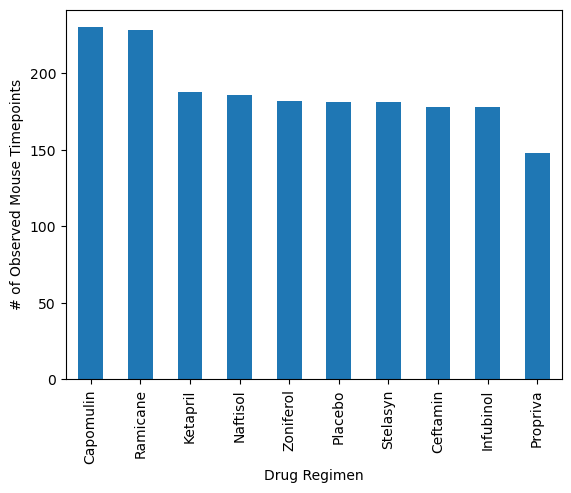

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_data['Drug Regimen'].value_counts()

drug_regimen.plot(kind='bar')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()


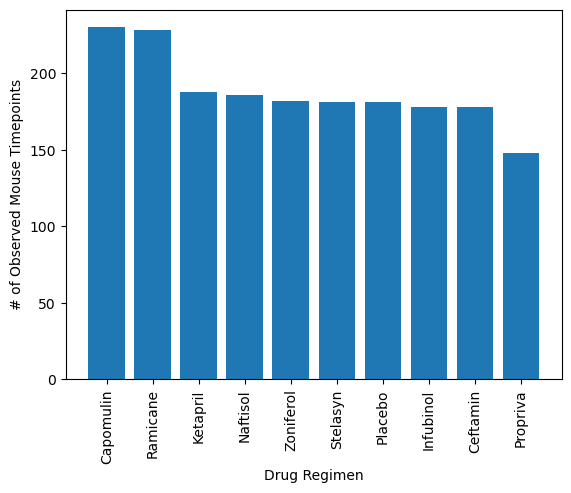

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
distribution = clean_data["Sex"].value_counts()

distribution.plot(kind='pie', figsize=(6,6), autopct='%1.1f%%')

plt.ylabel("Sex")

plt.show()


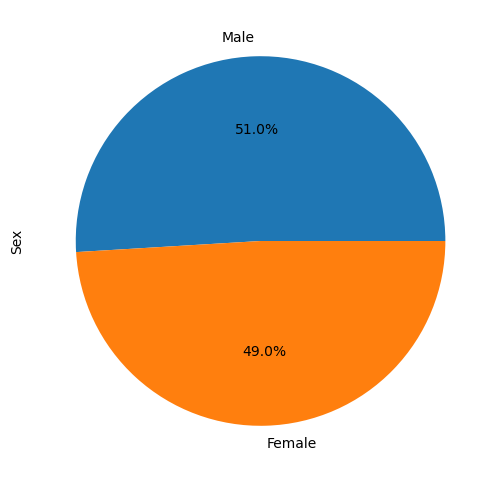

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
distribution = clean_data["Sex"].value_counts()

distribution.plot(kind='pie', figsize=(6,6), autopct='%1.1f%%')

plt.ylabel("Sex")

plt.show()

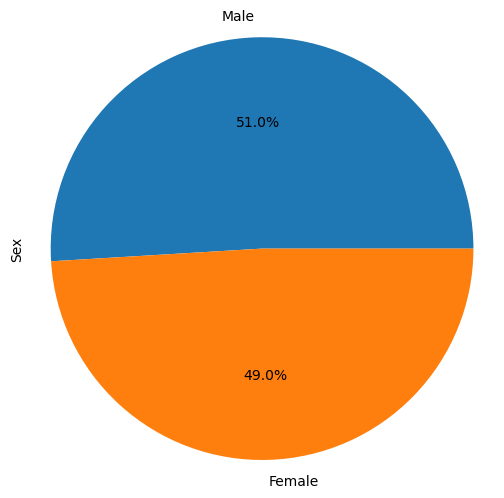

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution = clean_data["Sex"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(distribution, labels=distribution.index, autopct="%1.1f%%")

plt.ylabel("Sex")

plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
clean_data = mouse_results_df[mouse_results_df['Drug Regimen'].isin(treatment_regimens)]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(clean_data, last_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')

tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,h531,5,47.784682,0,Ceftamin,Male,5,27


In [17]:

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Ceftamin', 'Ramicane', 'Infubinol', 'Capomulin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = clean_data.loc[clean_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    #Cacluate IAR and quantitatively determine if there are any potential outliers
    quartiles = tumor_vol.quantile([0.25, 0.75])
    upper_quartile = quartiles[0.75]
    lower_quartile = quartiles[0.25]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    upper_bound = upper_quartile + 1.5 * iqr
    lower_bound = lower_quartile - 1.5 * iqr
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: 1853    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: 1623    25.472143
1765    23.343598
Name: Tumor Volume (mm3), dtype: float64


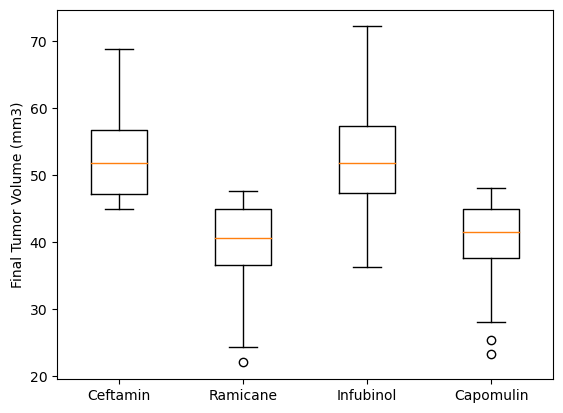

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()

ax.boxplot(tumor_vol_data, labels=treatments)

ax.set_ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

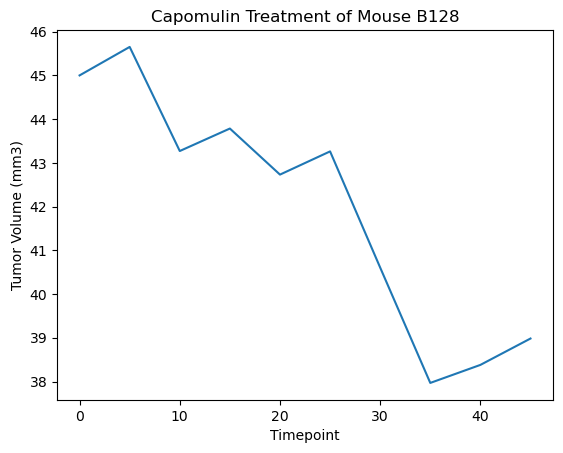

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "b128"

capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

plt.title('Capomulin Treatment of Mouse B128')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


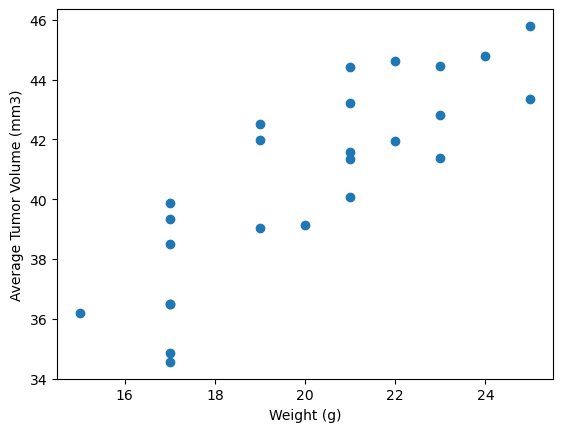

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mean_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, mean_tumor_vol, marker='o')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.841936342469472


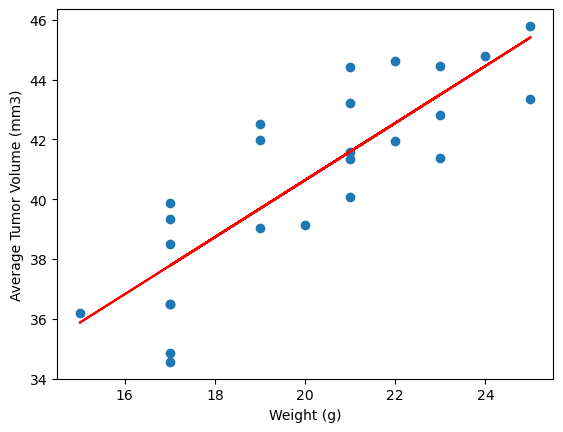

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient, _ = st.pearsonr(mouse_weight, mean_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, mean_tumor_vol)

plt.scatter(mouse_weight, mean_tumor_vol, marker='o', label='Data')

plt.plot(mouse_weight, intercept + slope * mouse_weight, color='r', label='Linear Regression')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()